# **Analyzing Police Activity**

# Preparing the data for analysis

In [1]:
# Import plotting modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Stanford Open Policing Project dataset

In [2]:
# Preparing the data

df = pd.read_csv("traffic.csv")
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [4]:
df.shape

(91741, 15)

**Examining the dataset**

**Dropping rows and columns**

In [5]:
df.drop('county_name', axis='columns', inplace=True)

In [6]:
df.dropna(subset=['stop_date','stop_time']).shape

(91741, 14)

In [7]:
# Count the number of missing values in each column
print(df.isnull().sum())

# Drop all rows that are missing 'driver_gender'
df.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(df.isnull().sum())

# Examine the shape of the DataFrame
print(df.shape)

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 14)


## Using proper data types

In [8]:
# Examining the data types
df.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

**Finding an incorrect data type**

In [9]:
df.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [10]:
df.head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


**Fixing a data type**

In [11]:
# Examine the head of the 'is_arrested' column
print(df.is_arrested.head())

# Check the data type of 'is_arrested'
print(df.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
df['is_arrested'] = df.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(df.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


## Creating a DatetimeIndex

In [12]:
# Using datetime format
df.head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [13]:
df.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

**Combining object columns**

In [14]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = df.stop_date.str.cat(df.stop_time, sep=' ')

# Convert 'combined' to datetime format
df['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(df.dtypes)

state                         object
stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


**Setting the index**

In [15]:
# Set 'stop_datetime' as the index
df.set_index('stop_datetime', inplace=True)

# Examine the index
print(df.index)

# Examine the columns
print(df.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## Exploring the relationship between gender and policing

## Do the genders commit different violations?

In [16]:
# Counting unique values
df.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [17]:
df.stop_outcome.value_counts().sum()

86536

In [18]:
df.shape

(86536, 14)

In [19]:
df.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [20]:
# Filtering DataFrame rows
df.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [21]:
white = df[df.driver_race == 'White']
white.shape

(61870, 14)

In [22]:
# Comparing stop outcomes for two groups
white.stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [23]:
asian = df[df.driver_race == 'Asian']
asian.stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

**Examining traffic violations**

In [24]:
# Count the unique values in 'violation'
print(df.violation.value_counts())

# Express the counts as proportions
print(df.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


**Comparing violations by gender**

In [25]:
# Create a DataFrame of female drivers
female =df[df.driver_gender == 'F']

# Create a DataFrame of male drivers
male = df[df.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


## Does gender affect who gets a ticket for speeding?

In [26]:
# Filtering by multiple conditions
female = df[df.driver_gender == 'F']
female.shape

(23774, 14)

In [28]:
female_and_arrested = df[(df.driver_gender == 'F') & 
                         (df.is_arrested == True)]
female_and_arrested.shape

(669, 14)

In [29]:
female_or_arrested = df[(df.driver_gender == 'F') |
                        (df.is_arrested == True)]
female_or_arrested.shape

(26183, 14)

**Filtering by multiple conditions**

Which one of these commands would filter the ri DataFrame to only include female drivers who were stopped for a speeding violation?

In [30]:
df[(df.driver_gender == 'F') & (df.violation == 'Speeding')].head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,RI,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,RI,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


**Comparing speeding outcomes by gender**

In [32]:
# Create a DataFrame of female ddfvers stopped for speeding
female_and_speeding = df[(df.driver_gender == 'F') & (df.violation == 'Speeding')]

# Create a DataFrame of male ddfvers stopped for speeding
male_and_speeding = df[(df.driver_gender == 'M') & (df.violation == 'Speeding')]

# Compute the stop outcomes for female ddfvers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male ddfvers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


## Does gender affect whose vehicle is searched?

In [33]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [34]:
# Taking the mean of a Boolean Series
df.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [35]:
df.is_arrested.mean()

0.0355690117407784

In [36]:
df.is_arrested.dtype

dtype('bool')

In [37]:
# Comparing groups using groupby
df.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [38]:
df[df.district == 'Zone K1'].is_arrested.mean()

0.024349083895853423

In [39]:
df[df.district == 'Zone K2'].is_arrested.mean()

0.030800588834786546

In [40]:
df.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [41]:
# Grouping by multiple categories
df.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [ ]:
df.groupby(['driver_gender','district']).is_arrested.mean()

**Calculate the search rate**

In [42]:
# Check the data type of 'search_conducted'
print(df.search_conducted.dtype)

# Calculate the search rate by counting the values
print(df.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(df.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


**Comparing search rates by gender**

In [43]:
# Calculate the search rate for female drivers
print(df[df.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [44]:
# Calculate the search rate for male drivers
print(df[df.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


In [45]:
# Calculate the search rate for both groups simultaneously
print(df.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


**Adding a second factor to the analysis**

In [46]:
# Calculate the search rate for each combination of gender and violation
print(df.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [47]:
# Reverse the ordering to group by violation before gender
print(df.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


## Does gender affect who is frisked during a search?

In [48]:
# Examining the search types
df.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [49]:
df.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [50]:
# Searching for a string
df['inventory'] = df.search_type.str.contains('Inventory', na=False)

In [51]:
df.inventory.dtype

dtype('bool')

In [52]:
df.inventory.sum()

441

In [53]:
# Calculating the inventory rate
df.inventory.mean()

0.0050961449570121106

In [54]:
searched = df[df.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

0.5% of all traffic stops resulted in an inventory  
13.3% of searches included an inventory

**Counting protective frisks**

In [55]:
# Count the 'search_type' values
print(df.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [56]:
# Check if 'search_type' contains the string 'Protective Frisk'
df['frisk'] = df.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(df.frisk.dtype)

bool


In [57]:
# Take the sum of 'frisk'
print(df.frisk.sum())

303


**Comparing frisk rates by gender**

In [58]:
# Create a DataFrame of stops in which a search was conducted
searched = df[df.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [59]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## Visual exploratory data analysis

## Does time of day affect arrest rate?

**Calculating the hourly arrest rate**

In [60]:
# Calculate the overall arrest rate
print(df.is_arrested.mean())

0.0355690117407784


In [61]:
# Calculate the hourly arrest rate
#print(df.is_arrested.groupby(df.index.hour).mean())

# Save the hourly arrest rate
hourly_arrest_rate = df.is_arrested.groupby(df.index.hour).mean()

**Plotting the hourly arrest rate**

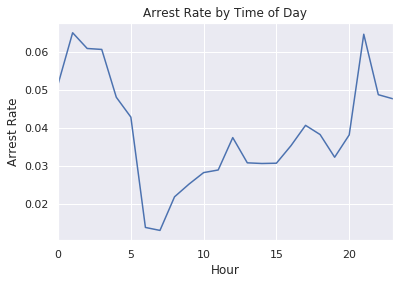

In [62]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.savefig('arrestrate.png',format='png')
plt.show()

## Are drug-related stops on the rise?

**Plotting drug-related stops**

In [63]:
# Calculate the annual rate of drug-related stops
print(df.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


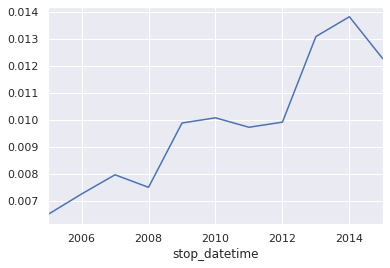

In [65]:
# Save the annual rate of drug-related stops
annual_drug_rate = df.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.savefig('drugs_related_stop',format='png')
plt.show()

**Comparing drug and search rates**

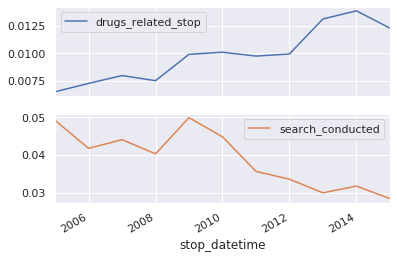

In [66]:
# Calculate and save the annual search rate
annual_search_rate = df.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)
plt.savefig('annual_drug_rate',format='png')
# Display the subplots
plt.show()

## What violations are caught in each district?

In [67]:
# Computing a frequency table
table = pd.crosstab(df.driver_race, df.driver_gender)
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


Frequency table: Tally of how many times each combination of values occurs

In [68]:
df[(df.driver_race == 'Asian') & (df.driver_gender == 'F')].shape

(551, 16)

In [69]:
# Selecting a DataFrame slice
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [70]:
table = table.loc['Asian':'Hispanic']
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


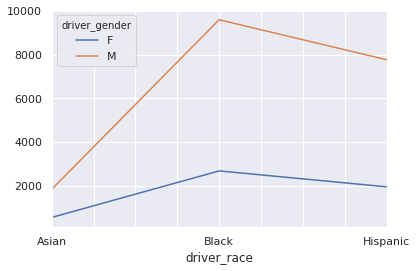

In [71]:
# Creating a line plot
table.plot()
plt.savefig('driver_gender.png',format='png')
plt.show()

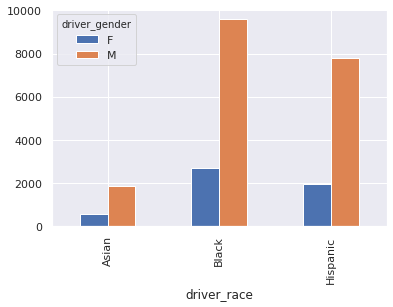

In [72]:
# Creating a bar plot
table.plot(kind='bar')
plt.savefig('driver_gender',format='png')
plt.show()

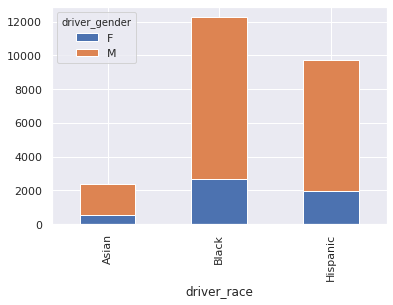

In [73]:
# Stacking the bars
table.plot(kind='bar', stacked=True)
plt.show()

**Tallying violations by district**

In [74]:
# Create a frequency table of districts and violations
print(pd.crosstab(df.district,df.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(df.district,df.violation)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [75]:
# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


**Plotting violations by district**

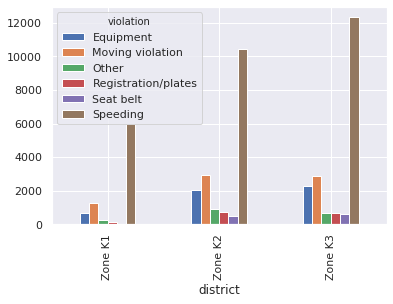

In [76]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

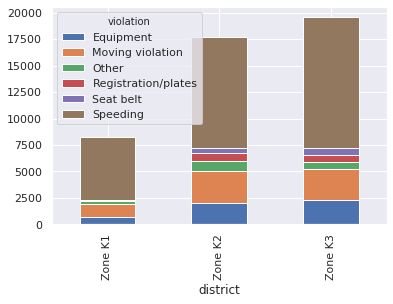

In [77]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar',stacked=True)

# Display the plot
plt.savefig('K_zones_stacked.png',format='png')
plt.show()

## How long might you be stopped for a violation?

**Calculating the search rate**

In [78]:
# Calculating the search rate
search_rate = df.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

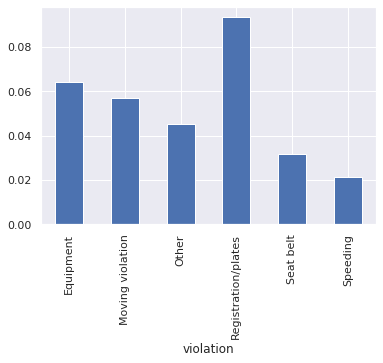

In [79]:
# Creating a bar plot
search_rate.plot(kind='bar')
plt.savefig('search_rate.png',format='png')
plt.show()

In [80]:
# Ordering the bars (1)
search_rate.sort_values()

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045362
Moving violation       0.057014
Equipment              0.064280
Registration/plates    0.093438
Name: search_conducted, dtype: float64

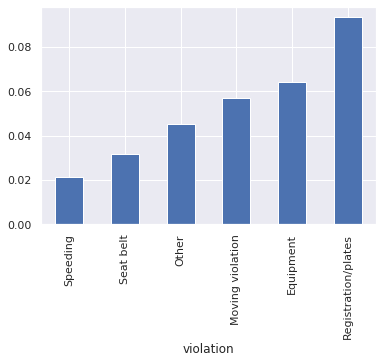

In [81]:
# Ordering the bars (2)
search_rate.sort_values().plot(kind='bar')
plt.savefig('sorted_search_rate',format='png')
plt.show()

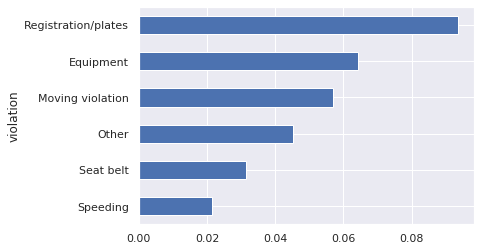

In [82]:
# Rotating the bars
search_rate.sort_values().plot(kind='barh')
plt.show()

**Converting stop durations to numbers**

In [84]:
# Print the unique values in 'stop_duration'
print(df.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
df['stop_minutes'] = df.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(df.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


**Plotting stop length**

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


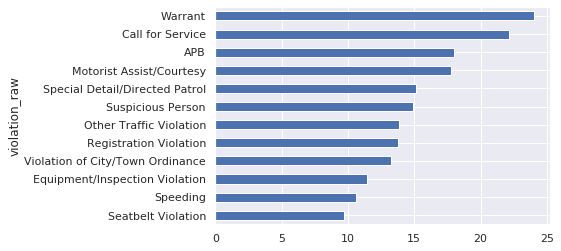

In [85]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(df.stop_minutes.groupby(df.violation_raw).mean())

# Save the resulting Series as 'stop_length'
stop_length = df.stop_minutes.groupby(df.violation_raw).mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values()

# Display the plot
stop_length.sort_values().plot(kind='barh')
plt.show()

----